## Support Vector Machines (SVM)

<img src="figures/SVM_margin.png" width="900"/>


Support Vector Machine (SVM) classifies data by identifying the best way to separate different groups within a multidimensional space. It does this by finding the maximum margin between the closest data points of opposing groups, thus creating the optimal hyperplane. The dimensionality of the input data determines whether this hyperplane is a line in a 2D space or a plane in a higher-dimensional space. SVM is widely used in machine learning because it is effective for both linear and nonlinear classification tasks. When the data is not linearly separable, kernel functions are applied to transform the data, enabling linear separation. This technique is known as the 'kernel trick'. The choice of kernel depends on the specific data and task at hand.

**Support Vectors**

Support vectors are the data points closest to the hyperplane. They help define the separating line by calculating margins, making them crucial for building the classifier.

**Hyperplane**

A hyperplane is a decision boundary that separates a set of objects into different classes.

**Margin**

A margin is the gap between two lines that are closest to the class points. It is measured as the perpendicular distance from these lines to the support vectors or closest points. A larger margin between the classes is considered good, while a smaller margin is considered bad.


### SVM Implementation 

Now, we will learn about its implementation in Python using `scikit-learn`.


#### Data generation
First, lets consider some articifial data: 

In [1]:
%load_ext lab_black

In [2]:
# First, let's import all the needed libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.datasets import make_blobs

import warnings

warnings.filterwarnings("ignore", "use_inf_as_na")

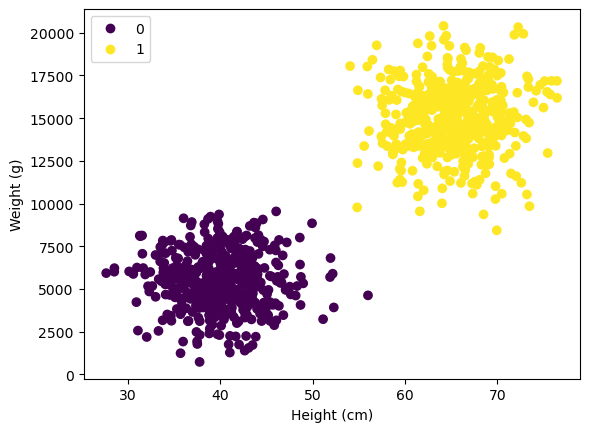

In [3]:
np.random.seed(28)
X, y = make_blobs(
    n_samples=1000,
    n_features=2,
    centers=[[40, 5500], [65, 15000]],
    #  center_box=(0, 200),
    cluster_std=[[4, 1700], [4, 2000]],
)


scatter = plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (g)")
plt.legend(*scatter.legend_elements())
plt.show()

Lets imagine we are dealing with 1000 height and weight samples of cats and dogs. No we want to train a linear classifier to seperate the two based on the height/ weight ratio. "0" stands for cats and "1" for dogs.

### Train-Test Splitting

In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=109
)  # 70% training and 30% test

### Feature Scaling

SVM are sensitive to feature scaling! This is why we want to min-max scale our inputs first!

> **Recall Feature Scaling**
> 
> Feature scaling is a technique used to convert numeric data into a standard range, enhancing the performance of algorithms. This is achieved by normalizing or standardizing the data values. One common feature scaling method is min-max scaling, which will be implemented here.
>
> Min-max scaling involves subtracting the minimum value of an attribute from each observation and then dividing by the range of the attribute.


In [5]:
def min_max(variable, xmin=None, xmax=None):
    if (xmin != None) & (xmax == None):  ## no we are able to set xmin manually
        xmax = variable.max()
        min_max_done = (variable - xmin + 1) / (xmax - xmin + 2)
        return xmin, xmax, min_max_done
    elif (xmin != None) & (
        xmax != None
    ):  ## no we are able to set xmin and xmax manually
        min_max_done = (variable - xmin + 1) / (xmax - xmin + 2)
        return xmin, xmax, min_max_done
    else:
        xmin, xmax = variable.min(), variable.max()
        min_max_done = (variable - xmin + 1) / (xmax - xmin + 2)
    return xmin, xmax, min_max_done

In [6]:
## training
X_train_scaled = X_train.copy()

X_train_min_0, X_train_max_0, X_train_scaled[:, 0] = min_max(X_train[:, 0])
X_train_min_1, X_train_max_1, X_train_scaled[:, 1] = min_max(X_train[:, 1])

## test data
X_test_scaled = X_test.copy()

X_test_min_0, X_test_max_0, X_test_scaled[:, 0] = min_max(X_test[:, 0])
X_test_min_1, X_test_max_1, X_test_scaled[:, 1] = min_max(X_test[:, 1])

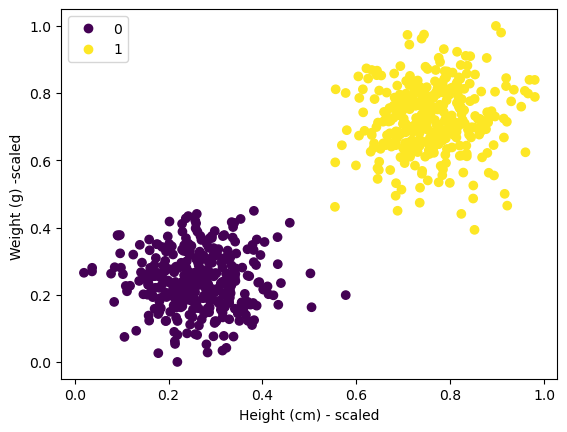

In [7]:
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train)
plt.xlabel("Height (cm) - scaled")
plt.ylabel("Weight (g) -scaled ")
plt.legend(*scatter.legend_elements())
plt.show()

### Train SVM Model

In [8]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel="linear")  # Linear Kernel

# Train the model using the training sets
clf.fit(X_train_scaled, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test_scaled)

### Evaluate Model

In [9]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy
# how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [10]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))

Precision: 1.0


In [11]:
# Create a mesh to plot decision boundaries
h = 0.1  # step size in the mesh
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

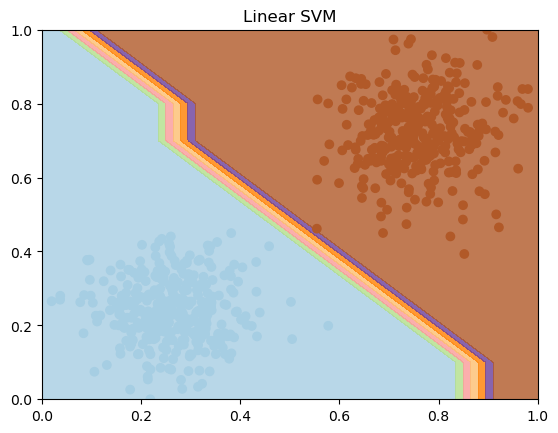

In [12]:
# Plot decision boundary of Linear SVM
Z_linear = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_linear = Z_linear.reshape(xx.shape)


plt.contourf(xx, yy, Z_linear, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.title("Linear SVM")
plt.xlabel("")
plt.ylabel("")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

#### Ressources for this script: 

SVM:
* [Scikit-Learn Documentation](https://scikit-learn.org/stable/modules/svm.html)

In [13]:
from IPython.display import IFrame

IFrame(
    src="../../citations/citation_Marie.html",
    width=900,
    height=200,
)